In [1]:
import numpy as np
import scipy.stats as stats

### Binomial Distribution

Take the example of the flipping of a coin. Let us label the outcome as $\gamma$ which can take two values $0$ or $1$. We then define a parameter $\theta$ which will give us the probability of the outcome being $\gamma$. This is written as:

\begin{equation}
P\left(\gamma|\theta\right) = \theta^{\gamma}\left(1-\theta\right)^{1-\gamma}
\end{equation}

The above distribution is known as the Binomial distribution or the Bernoulli distribution. This particular distribution can also be inferred in a different manner. We can consider that $\gamma$ to be fixed by an observation and the parameter $\theta$ to be a variable. The above equation then gives the probability of getting $\gamma$ output for different values of $\theta$. In this scenario, this function is called the likelihood function of the parameter $\theta$

In Bayesian inference, $P\left(\gamma|\theta\right)$ is usually thought of with the data $\gamma$ being fixed and certain and the parameter $\theta$ to be a variable and uncertain. In this particular case, this is known as the Bernoulli likelihood function of $\theta$. 

#### Fixed set of outcomes

Consider the case of multiple flips. Each flip can be considered independent of each other. The joint probability would be thus a product of all individual probabilities.

\begin{align}
P\left(\{\gamma_i\} |\theta\right) &=& \Pi_i p\left(\gamma_i|\theta\right)\\
                                   &=& \theta^{\Sigma_i \gamma_i}\left(1-\theta\right)^{\Sigma_i\left(1-\gamma_i\right)}\\
                                   &=& \theta^{z}\left(1-\theta\right)^{N-z}
\end{align}

where $N$ is the total number of tosses and $z = \Sigma_i\gamma_i$ is the number of heads

### Conjugate Priors

The Baye's rule is given by :

\begin{equation}
P\left(\gamma|\theta\right) = \frac{P\left(\theta|\gamma\right)P\left(\theta\right)}{\int d\theta' P\left(\theta'|\gamma\right)P\left(\theta'\right)}
\end{equation}

Bayesian statistics involve the idea of a prior and a posterior distribution of probabilities. In the Bayes's rule given above, $P\left(\theta\right)$ is the prior probability and the posterior probability upon the outcome of an experiment or an observation is given by the term on the left hand side $P\left(\gamma|\theta\right)$. 

Ideally we can assume any form of function for the prior distribution as long as the outcome lies in the range $[0, 1]$. However it would be mathematically far more simpler if on multiplication by the likelihood function, the posterior distribution has the same functional form as the prior. This would indeed make future posterior probaility functions very easy to caluculate. It would also be helpful if the denominator $\int d\theta' P\left(\theta'|\gamma\right)P\left(\theta'\right)$ be analytically solvable. In the particular scenarios where the prior and posterior distributions has the same functional form, the posterior is said to be conjugate of the prior.

##### Note: A conjugate prior is related to the likelihood function under consideration. If you change the likelihood function will probably need a different conjugate prior.

### Conjugate function for a Bernoulli likelihood function

The outcome of a single coin toss or a multiple coin toss can be decsribed by the Bernoulli function as depicted in the previous function. Bernoulli function has the form $\theta^{\gamma}\left(1-\theta\right)^{1-\gamma}$. An appropriate prior function should look like $\theta^a\left(1-\theta\right)^b$ which when multiplied by the Bernoulli likelihood will have the same functional form. 

The Beta distribution function given by 
\begin{equation}
\beta\left(\theta, a, b\right) = \frac{\theta^a\left(1-\theta\right)^b}{B\left(a, b\right)}
\end{equation}

will be a possible conjugate prior to the Bernoulli likelihood function, here $B\left(a, b\right)$ is a normalizing factor so that the area under the integration goes to 1. In effect we will have the prior probaility as $P\left(\theta\right) = \beta\left(\theta, a, b\right)$

Also the normalizer $B\left(\theta\right)$ is given by:
\begin{equation}
B\left(a, b\right) = \int d\theta\text{ } \theta^a\left(1-\theta\right)^b
\end{equation}

which is the beta function.

#### Choosing a prior
The choice of a prior depends on the information available to us. For example, if we do not know anything about the coin that is about to be tossed, then probable we will assume that it is equally likely to have all values of the parameter $\theta$. That would correspond to $P\left(\theta\right) = \frac{\theta^a\left(1-\theta\right)^b}{\beta\left(a, b\right)}$ with $a=1, b=1$

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from scipy.stats import beta

In [4]:
a, b = 1, 1
x = np.linspace(0, 1, 100)


Text(0,0.5,'$P\\left(\\theta\\right)$')

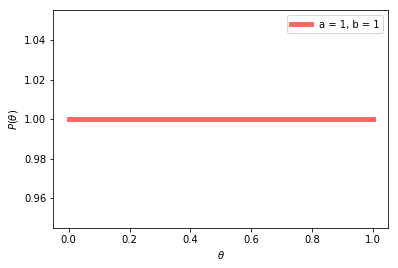

In [5]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, beta.pdf(x, a, b),'r-', lw=5, alpha=0.6, label='a = {}, b = {}'.format(a,b))
ax.legend(loc = 'best')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$P\left(\theta\right)$')

Let us look at the various shapes of priors we can choose from depending upn the previous information that might be provided to us:


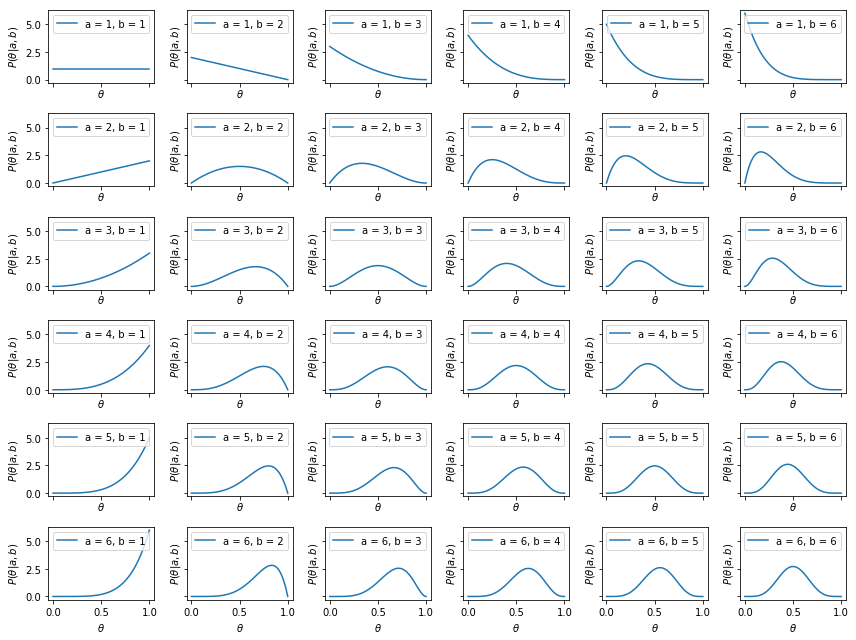

In [6]:
a,  b = [[1,2,3,4,5,6], [1,2,3,4,5,6]]
fig1, ax1 = plt.subplots(len(a), len(b), sharex = 'all', sharey = 'all', figsize = (12, 9))
for i in range(len(a)):
    for j in range(len(b)):
        ax1[i, j].plot(x, beta.pdf(x, i+1, j+1),  label='a = {}, b = {}'.format(i+1,j+1))
        ax1[i, j].legend(loc = 'best')
        ax1[i, j].set_xlabel(r'$\theta$')
        ax1[i, j].set_ylabel(r'$P\left(\theta|a,b\right)$')
fig1.tight_layout()
        

The above plots shows the various prior distribution functions that might be available to us depending on our experience and available information. In the figures shown above the total no. of tosses are $n = a + b$. We can see that for $a=6, b=6$ the distrinution is narrow around $\theta = 0.5$ compared to the case of $a=4, b = 4$. This means that with more information we can choose a prior that has more confidence. 

### Some more properties of the beta distribution function

The choice of a prior is quite often dependent on the information that we have acquired and our own biases. For e.g. if we know that a coin has been minted in a government facility, then we would reasonably assume that the parameter $\theta $ is centred around $0.5$. Depending upon our confidence in the government minting facilty we could assume prior to performing any experiment that if we had performed 200 experiments then half of it would have turned up heads and the other half tails. That would correspond to a very narrow distribution of the probability $P\left(\theta|a,b\right)$ centered around $\theta = 0.5$. Thus it would be useful to know the central tendencies of this distribution (or as matter of fact any prior distribution one might assume.)

The mean of the distribution function $B\left(\theta|a, b\right)$ is :
\begin{equation}
\mu = \frac{a}{a+b}
\end{equation}
The mode is given by :
\begin{equation}

\end{equation}